In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [3]:
img_size=150
batch=32
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory(
    '/kaggle/input/satellite123/data',
    target_size=(img_size,img_size),
    batch_size=batch,
    class_mode='categorical',
    subset='training'
)

Found 4505 images belonging to 4 classes.


In [5]:
val_generator=train_datagen.flow_from_directory(
    '/kaggle/input/satellite123/data',
    target_size=(img_size,img_size),
    batch_size=batch,
    class_mode='categorical',
    subset='validation'
)

Found 1126 images belonging to 4 classes.


In [6]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(4,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      42,467,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,489,284 (162.08 MB)

 Trainable params: 42,489,284 (162.08 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.6353 - loss: 1.1027 - val_accuracy: 0.8215 - val_loss: 0.3566
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8310 - loss: 0.3933 - val_accuracy: 0.8659 - val_loss: 0.3177
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.8518 - loss: 0.3382 - val_accuracy: 0.8694 - val_loss: 0.3663
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8372 - loss: 0.3671 - val_accuracy: 0.8792 - val_loss: 0.2919
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8624 - loss: 0.3293 - val_accuracy: 0.8979 - val_loss: 0.2718
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8805 - loss: 0.2914 - val_accuracy: 0.8410 - val_loss: 0.2932
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.8840 - loss: 0.2840 - val_accuracy: 0.8259 - val_loss: 0.3451
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8892 - loss: 0.2738 - val_accuracy: 

In [10]:
model.save('/kaggle/working/sat.h5')

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model("/kaggle/working/sat.h5")

In [35]:
categories=['cloudy','desert','green_area','water']
img_path='/kaggle/input/satellite123/data/cloudy/train_10333.jpg'

In [36]:
img=image.load_img(img_path,target_size=(img_size,img_size))
img_array=image.img_to_array(img)
print(img_array.shape)

(150, 150, 3)


In [37]:
img_array=np.expand_dims(img_array,axis=0)/255
print(img_array.shape)

(1, 150, 150, 3)


In [38]:
predictions = model.predict(img_array) 
predicted_index = np.argmax(predictions[0])
predicted_label = categories[predicted_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


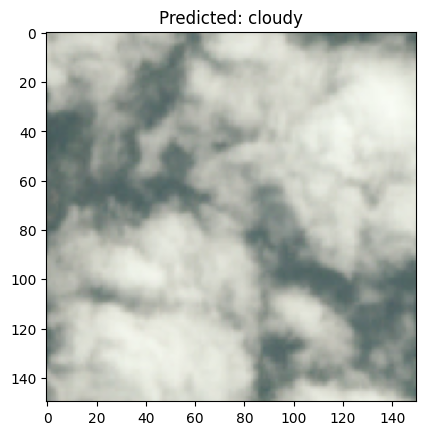

In [39]:
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.show()